In [13]:
import data_handler
import model as M
import dilated_model as DM
import trainer as T


import torch as th
from torch.autograd import Variable
import pickle
import random
random.seed(42)

In [14]:
from IPython import display
from scipy.io import loadmat
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.mlab import specgram
# import seaborn as sns
import time

%matplotlib inline
th.multiprocessing.set_sharing_strategy('file_system')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [15]:
dataset = data_handler.DataSet(
    'data/raw/training2017/REFERENCE.csv', data_handler.load_crop,
    path='data/raw/training2017/',
    remove_noise=True, tokens='NAO')
train_set, eval_set = dataset.disjunct_split(.8)
train_producer = th.utils.data.DataLoader(
        dataset=train_set, batch_size=1, shuffle=True,
        num_workers=0, collate_fn=data_handler.batchify)

In [16]:
data = iter(train_producer).next()
in_channels = data['x'].size()[1]

In [17]:
nondilNet = M.BaseLineFCN(in_channels, [128, 256, 128])
dilNet = DM.DilatedFCN(in_channels, [128, 256, 128], [[16, 32, 64]]*3)
    

# PROOF OF CONCEPT

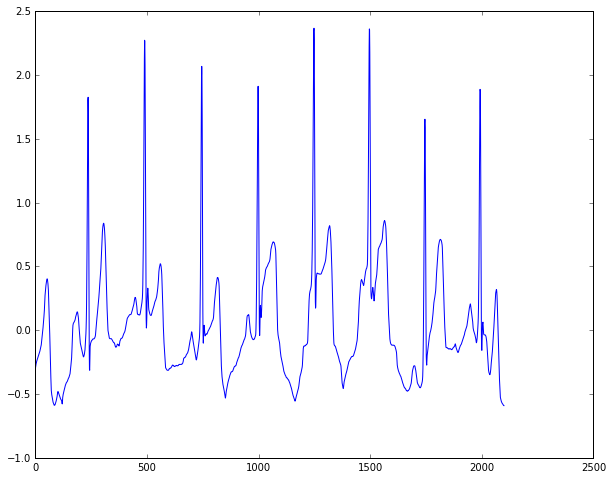

In [18]:
_data = data['x']
plt.plot(_data.data.numpy().squeeze())

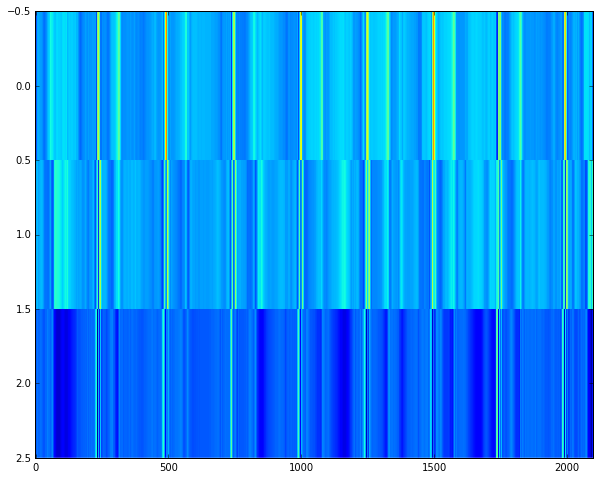

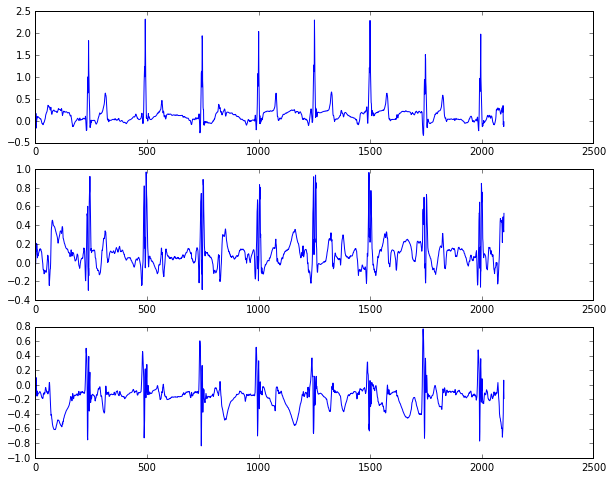

In [19]:
nondil_res = nondilNet.forward_conv(_data, )
plt.imshow(nondil_res.data.numpy().squeeze(), aspect="auto", interpolation='None')
plt.show()
plt.subplot(3,1,1)
plt.plot(nondil_res.data.numpy().squeeze()[0])

plt.subplot(3,1,2)
plt.plot(nondil_res.data.numpy().squeeze()[1])

plt.subplot(3,1,3)
plt.plot(nondil_res.data.numpy().squeeze()[2])

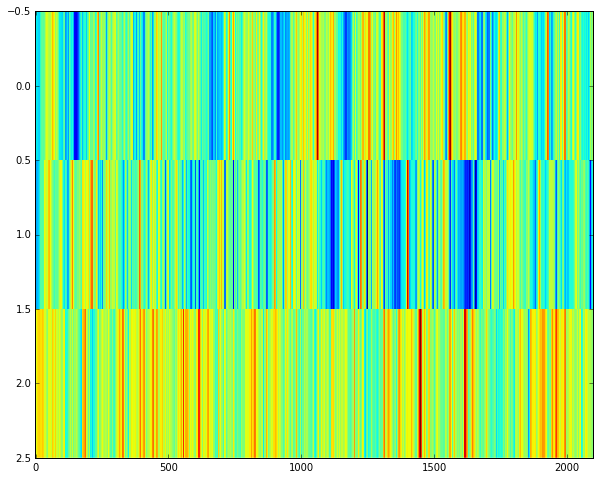

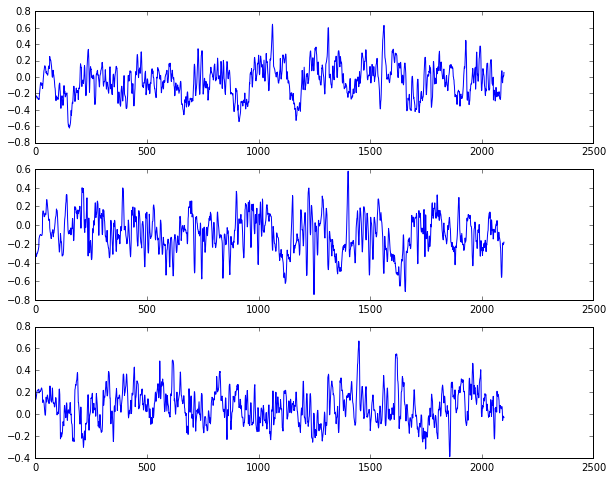

In [20]:
dil_res = dilNet.forward_conv(_data, )
plt.imshow(dil_res.data.numpy().squeeze(), aspect="auto", interpolation='None')
plt.show()

plt.subplot(3,1,1)
plt.plot(dil_res.data.numpy().squeeze()[0])

plt.subplot(3,1,2)
plt.plot(dil_res.data.numpy().squeeze()[1])

plt.subplot(3,1,3)
plt.plot(dil_res.data.numpy().squeeze()[2])
